## Required lib and modules

In [38]:
pip install hvplot

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns


## Importing Data files

In [3]:
baner = pd.read_excel('data_source/Baner_cleaned.xlsx')
bavdhan = pd.read_excel('data_source/Bavdhan_cleaned.xlsx')
hinjewadi = pd.read_excel('data_source/Hinjawadi_cleaned.xlsx')
wakad = pd.read_excel('data_source/Wakad_cleaned.xlsx')

## Handling Data Files

In [4]:
baner['locality'] = 'Baner'
bavdhan['locality'] = 'Bavdhan'
hinjewadi['locality'] = 'Hinjewadi'
wakad['locality'] = 'Wakad'

In [5]:
baner_copy = baner.copy()
baner_copy =baner_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

bavdhan_copy = bavdhan.copy()
bavdhan_copy =bavdhan_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

hinjewadi_copy = hinjewadi.copy()
hinjewadi_copy =hinjewadi_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

wakad_copy = wakad.copy()
wakad_copy =wakad_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

### Cleaning the delilvery reviews column

In [6]:
baner_copy.delivery_reviews=baner_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
bavdhan_copy.delivery_reviews=bavdhan_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
hinjewadi_copy.delivery_reviews=hinjewadi_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
wakad_copy.delivery_reviews=wakad_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')

### Replacing value of K with 1000

In [7]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    return x
baner_copy['delivery_reviews'] = baner_copy['delivery_reviews'].apply(value_to_float)
bavdhan_copy['delivery_reviews'] = bavdhan_copy['delivery_reviews'].apply(value_to_float)
hinjewadi_copy['delivery_reviews'] = hinjewadi_copy['delivery_reviews'].apply(value_to_float)
wakad_copy['delivery_reviews'] = wakad_copy['delivery_reviews'].apply(value_to_float)

### HANDLING BANER DATA SET

### Dropping NAN values

In [8]:
baner_ratings = baner_copy.dropna(subset=['ratings','delivery_reviews'])
baner_ratings = baner_ratings[baner_ratings.delivery_reviews != '']

bavdhan_ratings = bavdhan_copy.dropna(subset=['ratings','delivery_reviews'])
bavdhan_ratings = bavdhan_ratings[bavdhan_ratings.delivery_reviews != '']

hinjewadi_ratings = hinjewadi_copy.dropna(subset=['ratings','delivery_reviews'])
hinjewadi_ratings = hinjewadi_ratings[hinjewadi_ratings.delivery_reviews != '']

wakad_ratings = wakad_copy.dropna(subset=['ratings','delivery_reviews'])
wakad_ratings = wakad_ratings[wakad_ratings.delivery_reviews != '']

### Converting the Values to Integers

In [9]:
def clean(x):
    try:
        return float(x)
    except:
        return np.NaN
baner_ratings['delivery_reviews']  = baner_ratings['delivery_reviews'].apply(clean)
bavdhan_ratings['delivery_reviews']  = bavdhan_ratings['delivery_reviews'].apply(clean)
hinjewadi_ratings['delivery_reviews']  = hinjewadi_ratings['delivery_reviews'].apply(clean)
wakad_ratings['delivery_reviews']  = wakad_ratings['delivery_reviews'].apply(clean)

### Changing values of Delivery reviews 

In [44]:
baner_ratings['delivery_reviews'].where(~(baner_ratings['delivery_reviews']>10000.0), other=10000, inplace=True)
bavdhan_ratings['delivery_reviews'].where(~(bavdhan_ratings['delivery_reviews']>10000.0), other=10000, inplace=True)
hinjewadi_ratings['delivery_reviews'].where(~(hinjewadi_ratings['delivery_reviews']>10000.0), other=10000, inplace=True)
wakad_ratings['delivery_reviews'].where(~(wakad_ratings['delivery_reviews']>10000.0), other=10000, inplace=True)

### Converting delivery values to range of 1-5

In [45]:
deliv = []
for x in (baner_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (10000.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
baner_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
baner_ratings['deliv']= df['deliv']

In [46]:
deliv = []
for x in (bavdhan_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (10000.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
bavdhan_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
bavdhan_ratings['deliv']= df['deliv']

In [47]:
deliv = []
for x in (hinjewadi_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (10000.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
hinjewadi_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
hinjewadi_ratings['deliv']= df['deliv']

In [48]:
deliv = []
for x in (wakad_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (10000.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
wakad_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
wakad_ratings['deliv']= df['deliv']

## Sorting values

In [49]:
baner_ratings.sort_values(by=['ratings', 'deliv'], ascending=False, inplace=True)
baner_ratings.reset_index(inplace = True, drop = True)

bavdhan_ratings.sort_values(by=['ratings', 'deliv'], ascending=False, inplace=True)
bavdhan_ratings.reset_index(inplace = True, drop = True)

hinjewadi_ratings.sort_values(by=['ratings', 'deliv'], ascending=False, inplace=True)
hinjewadi_ratings.reset_index(inplace = True, drop = True)

wakad_ratings.sort_values(by=['ratings', 'deliv'], ascending=False, inplace=True)
wakad_ratings.reset_index(inplace = True, drop = True)

### Making different sets of data

In [50]:
above_four =  baner_ratings.loc[(baner_ratings.ratings > 4.0)]
above_four.reset_index(inplace = True, drop = True)
above_three = baner_ratings.loc[(baner_ratings.ratings >3.0) & (baner_ratings.ratings < 4.0)]
above_three.reset_index(inplace = True, drop = True)
above_two = baner_ratings.loc[(baner_ratings.ratings >2.0) & (baner_ratings.ratings < 3.0)]
above_two.reset_index(inplace = True, drop = True)
above_one = baner_ratings.loc[(baner_ratings.ratings >1.0) & (baner_ratings.ratings < 2.0)]
above_one.reset_index(inplace = True, drop = True)

In [51]:
baner_ratings

,Name,locality,ratings,off,delivery_reviews,cuisine,deliv
0,LKD | La Kheer Deli,Baner,4.5,₹50 OFF,2002.0,Desserts,1.00
1,Natural Ice Cream,Baner,4.5,₹50 OFF,1621.0,"Ice Cream, Desserts",0.81
2,Squeezo Foods,Baner,4.5,₹50 OFF,1537.0,"Salad, Healthy Food, Sandwich, American, North...",0.77
3,Baskin Robbins,Baner,4.5,50% OFF,601.0,"Ice Cream, Desserts, Beverages",0.30
4,LKD | La Kheer Deli,Baner,4.5,50% OFF,211.0,Desserts,0.11
...,...,...,...,...,...,...,...
818,PDS Thali,Baner,2.8,50% OFF,56.0,North Indian,0.03
819,Desi Handi,Baner,2.8,50% OFF,61.0,"North Indian, Chinese, Biryani, Kebab, Beverages",0.03
820,South Express,Baner,2.8,₹50 OFF,23.0,"North Indian, Maharashtrian, Beverages",0.01
821,Chings N Roll,Baner,2.6,₹50 OFF,12.0,"Chinese, Rolls, Street Food",0.01


#### --------------------------------------------------------------------------------------------------------------------------------------------------

## HANDLING BAVDHAN DATA SET

In [52]:
bavdhan_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              834 non-null    object 
 1   locality          834 non-null    object 
 2   ratings           617 non-null    float64
 3   off               701 non-null    object 
 4   delivery_reviews  751 non-null    object 
 5   cuisine           834 non-null    object 
dtypes: float64(1), object(5)
memory usage: 39.2+ KB


## HANDLING HINJEWADI DATA SET

In [ ]:
hinjewadi_copy.info()

## HANDLING WAKAD DATA SET

In [ ]:
wakad_copy.info()

# -------------------------------------------------------------------------------------

## Scatter plotting one by one

/home/perman/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/perman/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0, flags=flags)


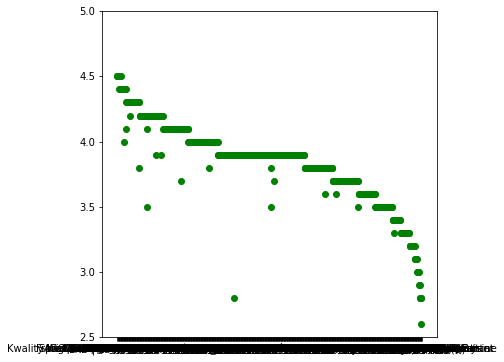

In [18]:
plt.figure(figsize=(6,6))
x = baner_ratings['Name']
y1 = baner_ratings['ratings']

axes = plt.gca()
axes.set_ylim([2.5,5.0])

plt.scatter(x, y1, color='g')
plt.show()

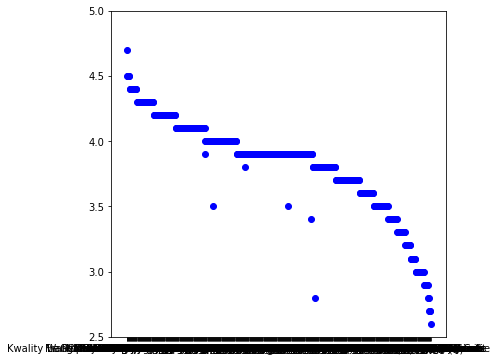

In [19]:
plt.figure(figsize=(6,6))
x = bavdhan_ratings['Name']
y1 = bavdhan_ratings['ratings']

axes = plt.gca()
axes.set_ylim([2.5,5.0])

plt.scatter(x, y1, color='b')
plt.show()

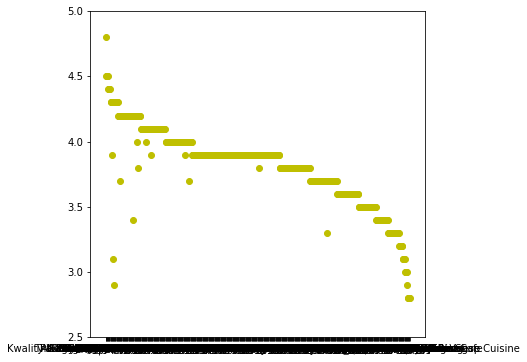

In [20]:
plt.figure(figsize=(6,6))
x = hinjewadi_ratings['Name']
y1 = hinjewadi_ratings['ratings']

axes = plt.gca()
axes.set_ylim([2.5,5.0])

plt.scatter(x, y1, color='y')
plt.show()

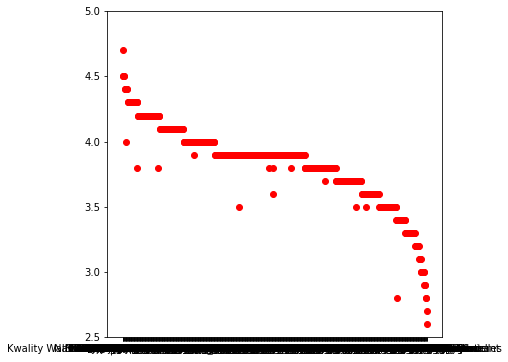

In [21]:
plt.figure(figsize=(6,6))
x = wakad_ratings['Name']
y1 = wakad_ratings['ratings']

axes = plt.gca()
axes.set_ylim([2.5,5.0])

plt.scatter(x, y1, color='r')
plt.show()

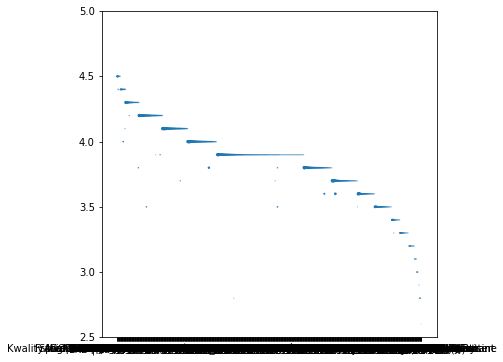

In [33]:
plt.figure(figsize=(6,6))
x = baner_ratings['Name']
y1 = baner_ratings['ratings']
y2 = baner_ratings['deliv']

axes = plt.gca()
axes.set_ylim([2.5,5.0])

plt.scatter(x, y1,y2)
plt.show()

<Figure size 720x720 with 0 Axes>

/home/perman/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/perman/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0, flags=flags)


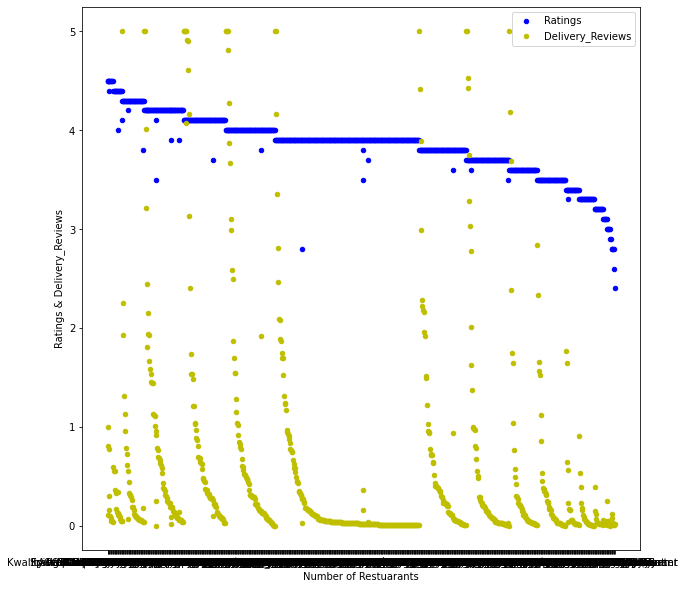

In [53]:
plt.figure(figsize=(10,10))
ax = baner_ratings.plot(kind="scatter", x='Name', y='ratings', color="b",label="Ratings",figsize=(10, 10))
baner_ratings.plot( kind="scatter",x='Name', y='deliv', color="y",label="Delivery_Reviews", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings & Delivery_Reviews")

plt.show()

<Figure size 720x720 with 0 Axes>

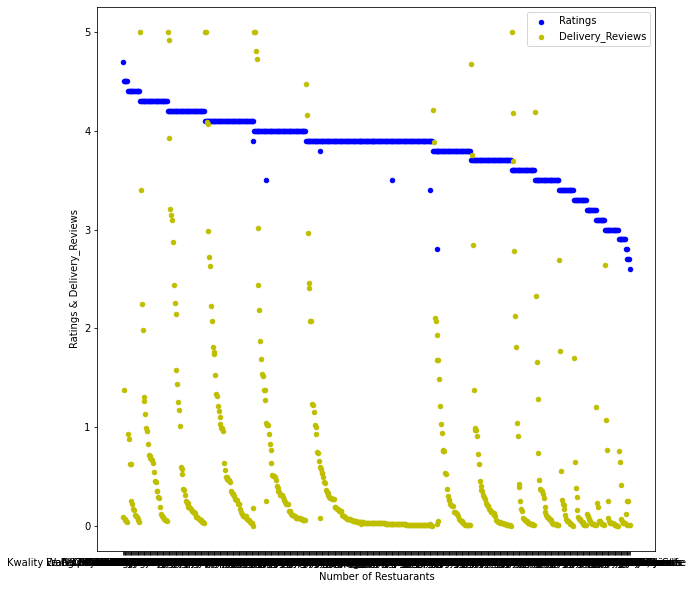

In [54]:
plt.figure(figsize=(10,10))
ax = bavdhan_ratings.plot(kind="scatter", x='Name', y='ratings', color="b",label="Ratings",figsize=(10, 10))
bavdhan_ratings.plot( kind="scatter",x='Name', y='deliv', color="y",label="Delivery_Reviews", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings & Delivery_Reviews")

plt.show()

<Figure size 720x720 with 0 Axes>

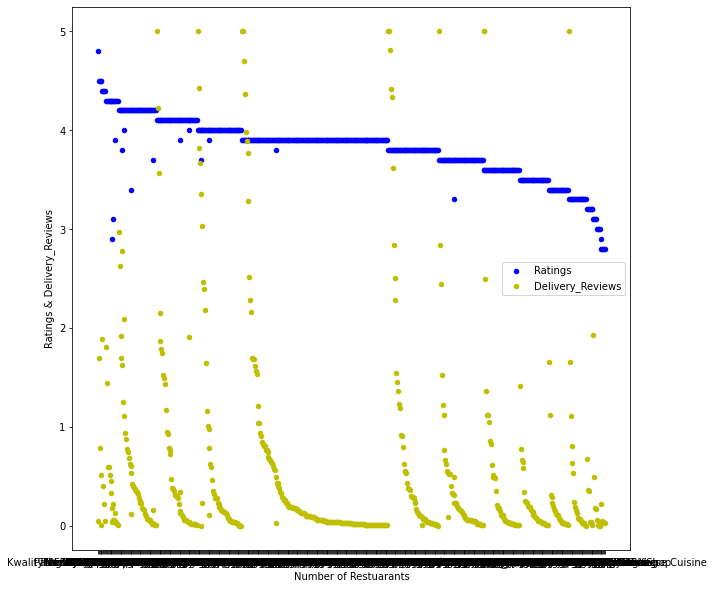

In [55]:
plt.figure(figsize=(10,10))
ax = hinjewadi_ratings.plot(kind="scatter", x='Name', y='ratings', color="b",label="Ratings",figsize=(10, 10))
hinjewadi_ratings.plot( kind="scatter",x='Name', y='deliv', color="y",label="Delivery_Reviews", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings & Delivery_Reviews")

plt.show()

<Figure size 720x720 with 0 Axes>

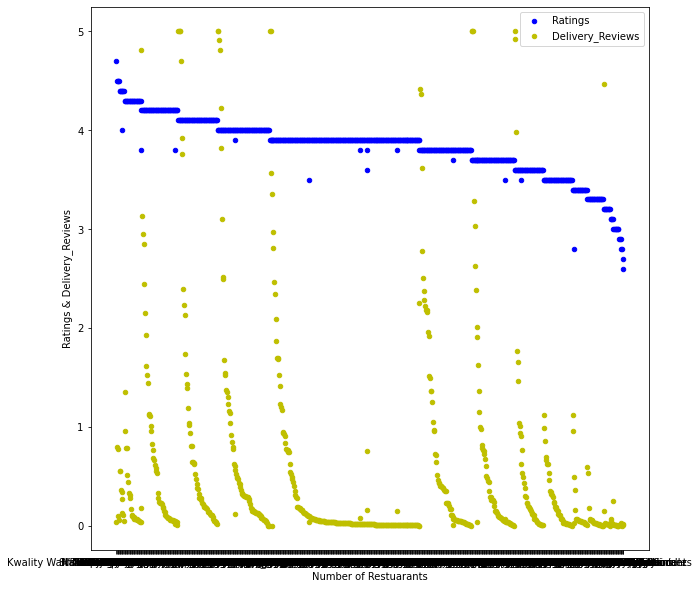

In [56]:
plt.figure(figsize=(10,10))
ax = wakad_ratings.plot(kind="scatter", x='Name', y='ratings', color="b",label="Ratings",figsize=(10, 10))
wakad_ratings.plot( kind="scatter",x='Name', y='deliv', color="y",label="Delivery_Reviews", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings & Delivery_Reviews")

plt.show()

### Combining these graphs all together

In [24]:
bob = pd.DataFrame()

In [25]:
bob = bob.assign(index = baner_ratings.index,baner=baner_ratings['ratings'],bavdhan=bavdhan_ratings['ratings'],
                                    hinjewadi=hinjewadi_ratings['ratings'],wakad=wakad_ratings['ratings'])

<Figure size 720x720 with 0 Axes>

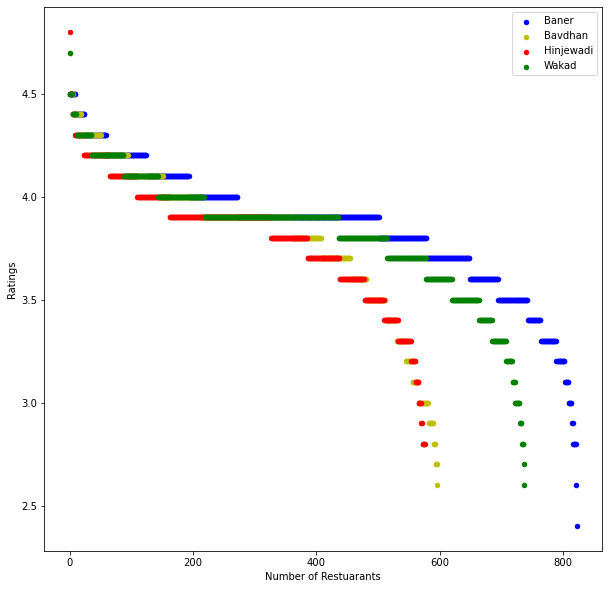

In [26]:
plt.figure(figsize=(10,10))
ax = bob.plot(kind="scatter", x='index', y='baner', color="b",label="Baner",figsize=(10, 10))
bob.plot( kind="scatter",x='index', y='bavdhan', color="y",label="Bavdhan", ax=ax)
bob.plot(kind="scatter", x='index', y='hinjewadi', color="r",label="Hinjewadi", ax=ax)
bob.plot(kind="scatter", x='index', y='wakad', color="g",label="Wakad",  ax=ax)

ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings")

plt.show()

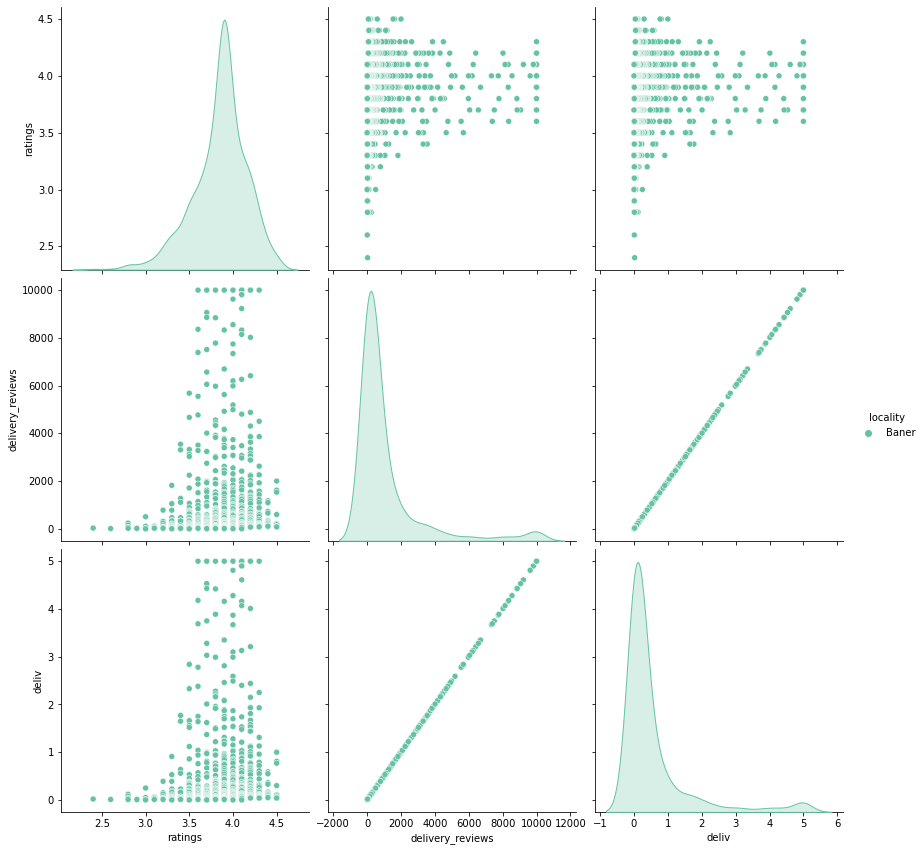

In [57]:
sns.pairplot(baner_ratings, hue = "locality", palette = "Set2",height = 4)

In [58]:
dev = pd.DataFrame()

In [59]:
dev = baner_ratings.sort_values(by='deliv', ascending=False, inplace=True)
#dev.reset_index(inplace = True, drop = True)

In [61]:
dev.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [ ]:
dev

## Ratings null and Not null count

### BANER

In [ ]:
print('Null values in Baner data set:', baner_copy['ratings'].isna().sum())

In [ ]:
baner_copy['ratings'].notnull().sum()

### BAVDHAN

In [ ]:
bavdhan_copy['ratings'].isna().sum()

In [ ]:
bavdhan_copy['ratings'].notnull().sum()

### HINJEWADI

In [ ]:
hinjewadi_copy['ratings'].isna().sum()

In [ ]:
hinjewadi_copy['ratings'].notnull().sum()

### WAKAD

In [ ]:
wakad_copy['ratings'].isna().sum()

In [ ]:
wakad_copy['ratings'].notnull().sum()

In [ ]:
baner_ratings.isna().sum()

In [ ]:
baner_copy.isnull().sum()